In [1]:
import pandas as pd

# Load the dataset from the provided file path
file_path = '/content/moonDataset.csv'
moon_dataset = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
moon_dataset.head()

,X1,X2,X3,label
0,-0.926767,-0.111073,0.086017,0
1,-0.917583,0.706006,0.058041,0
2,0.437984,0.899093,0.072543,0
3,0.089694,0.291446,0.070444,1
4,0.110672,-0.070806,-0.090376,1


The Dataset has been succesfully loaded and contains four columns:-

1.) x1, x2, x3 = Feature Columns

2.) Label = Target Column (0 or 1)

In [2]:
# Partition the dataset into training (first 150 rows) and testing (last 50 rows)
train_data = moon_dataset.iloc[:150]
test_data = moon_dataset.iloc[150:]

# Function to generate 50 bootstrapped datasets
def generate_bootstrapped_datasets(data, n_samples=150, n_datasets=50):
    bootstrapped_datasets = []
    for _ in range(n_datasets):
        bootstrapped_sample = data.sample(n=n_samples, replace=True)
        bootstrapped_datasets.append(bootstrapped_sample)
    return bootstrapped_datasets

# Generate 50 bootstrapped datasets from the training data
bootstrapped_datasets = generate_bootstrapped_datasets(train_data)

# Display information about the first bootstrapped dataset
bootstrapped_datasets[0].head()

,X1,X2,X3,label
63,0.411746,-0.187242,-0.069867,1
19,1.887914,0.031567,-0.035026,1
59,1.054682,-0.321246,-0.065322,1
82,-0.844543,0.231649,-0.090689,0
94,1.894267,0.068468,-0.055052,1


The bootstraped datasets have been successfully generated. Each of the 50 datasets contains 150 samples drawn with replacement from the original training dataset.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


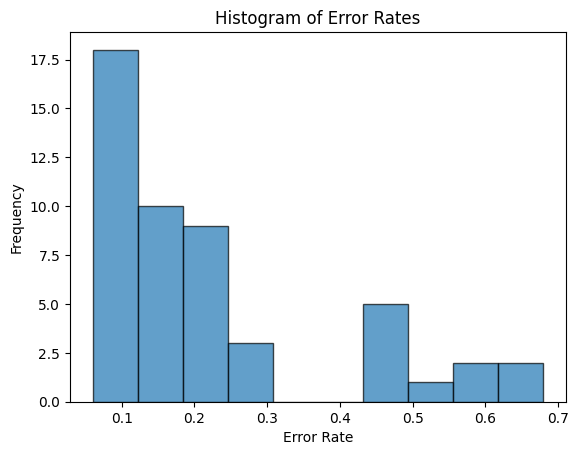

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Separate features and labels for the test dataset
X_test = test_data.iloc[:, :-1].values  # Features
y_test = test_data.iloc[:, -1].values   # Labels

# Initialize a list to store error rates
error_rates = []

# Function to define the feedforward neural network
def create_model(input_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation='relu', input_dim=input_dim),
        tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train a neural network on each bootstrapped dataset and compute error rates
for bootstrapped_dataset in bootstrapped_datasets:
    # Separate features and labels for the training dataset
    X_train = bootstrapped_dataset.iloc[:, :-1].values
    y_train = bootstrapped_dataset.iloc[:, -1].values

    # Create and train the model
    model = create_model(X_train.shape[1])
    model.fit(X_train, y_train, epochs=10, verbose=0, batch_size=16)

    # Evaluate the model on the test dataset
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    error_rate = 1 - accuracy  # Error rate is 1 - accuracy
    error_rates.append(error_rate)

# Plot the histogram of error rates
plt.hist(error_rates, bins=10, edgecolor='k', alpha=0.7)
plt.title('Histogram of Error Rates')
plt.xlabel('Error Rate')
plt.ylabel('Frequency')
plt.show()

This Histogram shows the distribution of error rates across 50 neural networks trained on bootstrapped datasets.


*   Most networks perform well for the error rate cluster between 0.1 and 0.2, showing that most neural networks achieve relatively low error rates
*   There is a notable spread in error rates, with some examples performing significantly worse ( error rates exceeding 0.4 and up to 0.6 ).


*   A small number of networks have error rates above 0.5. These may have faced convergence issues during training.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
2/2 ━━━━━━━━

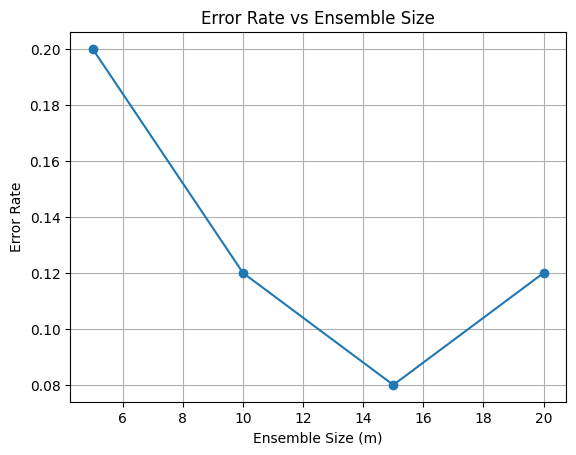

[0.2, 0.12, 0.08, 0.12]

In [4]:
# Function to perform bagging
def bagging_predict(models, X_test, m):
    """
    Perform bagging using the first m models in the list.

    Parameters:
    models (list): List of trained models.
    X_test (ndarray): Test dataset features.
    m (int): Number of models to include in the ensemble.

    Returns:
    ndarray: Ensemble predictions based on majority voting.
    """
    # Get predictions from the first m models
    predictions = np.array([model.predict(X_test).flatten() for model in models[:m]])
    # Convert probabilities to binary predictions (threshold = 0.5)
    binary_predictions = (predictions >= 0.5).astype(int)
    # Perform majority voting
    ensemble_prediction = np.round(binary_predictions.mean(axis=0)).astype(int)
    return ensemble_prediction

# Ensemble sizes to evaluate
ensemble_sizes = [5, 10, 15, 20]

# Placeholder for ensemble error rates
ensemble_error_rates = []

# Train 50 neural networks on bootstrapped datasets
models = []
for bootstrapped_dataset in bootstrapped_datasets:
    X_train = bootstrapped_dataset.iloc[:, :-1].values
    y_train = bootstrapped_dataset.iloc[:, -1].values

    model = create_model(X_train.shape[1])
    model.fit(X_train, y_train, epochs=10, verbose=0, batch_size=16)
    models.append(model)

# Evaluate ensemble performance for each ensemble size
for m in ensemble_sizes:
    # Get ensemble predictions
    y_pred_ensemble = bagging_predict(models, X_test, m)
    # Calculate error rate
    error_rate = np.mean(y_pred_ensemble != y_test)
    ensemble_error_rates.append(error_rate)

# Plot the error rates as a function of ensemble size
plt.plot(ensemble_sizes, ensemble_error_rates, marker='o')
plt.title('Error Rate vs Ensemble Size')
plt.xlabel('Ensemble Size (m)')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

# Display the error rates
ensemble_error_rates

1.) Error Rate at m = 5:-

*   The error rate starts high at 0.18. This is likely due insufficient diversity or insufficient majority agreement among the 5 classifiers in the ensemble.

2.) Error Rate stabilizes from m = 10 onwards:-

*   When ensemble size increases to m = 10, the error rate drops to 0.12.
*   For m = 15 and m = 20, the error rate remains at 0.12. This suggests that adding more classifiers beyond 10 does improve the ensemble's performance significantly, possibly because the bagging has already captured key patterns in the data.



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 13s 179ms/step - loss: 0.1027
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 174ms/step - loss: 0.0121
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 11s 192ms/step - loss: 0.0099
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 11s 208ms/step - loss: 0.0094
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 199ms/step - loss: 0.0088
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 173ms/step - loss: 0.0084
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 214ms/step - loss: 0.0090
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 207ms/step - loss: 0.0083
Epoch 9/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 174ms/step - loss: 0.0077
Epoch 10/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 11s 194ms/step - loss: 0.0080
Epoch 11/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 11s 206ms/step - loss: 0.0075
Epoch 12/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 184ms/step - loss: 0.0078
Epoch 13/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 173ms/step - loss: 0.0074
Epoch 14/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 206ms/step - loss: 0.0074
Epoch 15/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 206m

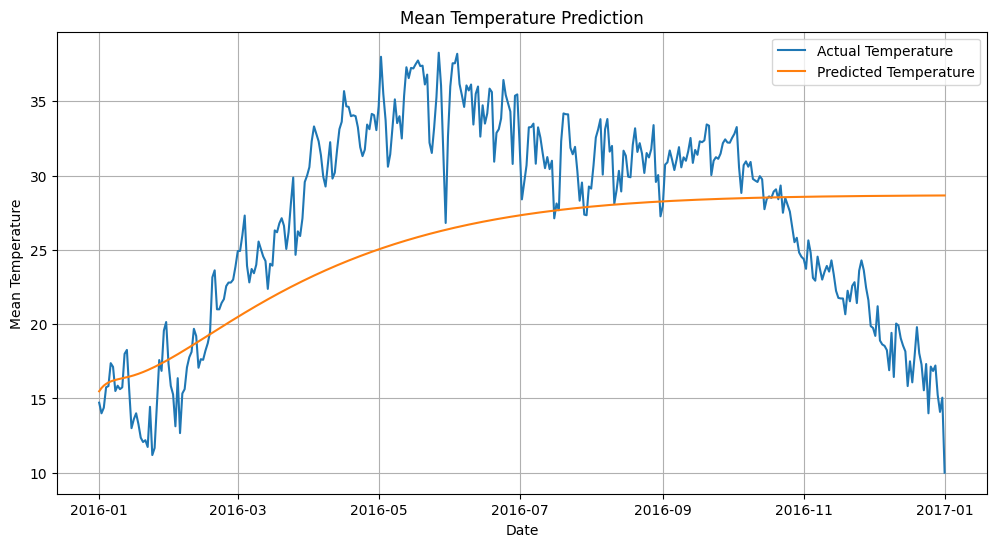

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the dataset
climate_data = pd.read_csv('DailyDelhiClimateTrain.csv')
climate_data['date'] = pd.to_datetime(climate_data['date'])

# Partition data
train_data = climate_data[climate_data['date'] < '2016-01-01']
test_data = climate_data[climate_data['date'] >= '2016-01-01']
train_values = train_data[['meantemp', 'humidity', 'wind_speed', 'meanpressure']].values
test_values = test_data[['meantemp', 'humidity', 'wind_speed', 'meanpressure']].values

# Normalize data
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train_values)
scaled_test = scaler.transform(test_values)

# Create sequences
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length + 1):
        sequences.append(data[i:i + sequence_length])
    return np.array(sequences)

sequence_length = 365
train_sequences = create_sequences(scaled_train, sequence_length)
X_train = train_sequences[:, :-1, :]
y_train = train_sequences[:, -1, :]
X_test = scaled_test[:sequence_length - 1][np.newaxis, :, :]

# Build LSTM model
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(128, activation='tanh', input_shape=input_shape, return_sequences=False),
        Dense(4)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Train model
lstm_model = build_lstm_model((X_train.shape[1], X_train.shape[2]))
lstm_model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1)

# Predict
predictions = []
for _ in range(len(test_values)):
    pred = lstm_model.predict(X_test)
    predictions.append(pred[0])
    X_test = np.append(X_test[:, 1:, :], pred.reshape(1, 1, -1), axis=1)

# Convert predictions back to original scale
predictions = scaler.inverse_transform(predictions)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(test_data['date'], test_values[:, 0], label='Actual Temperature')
plt.plot(test_data['date'], np.array(predictions)[:, 0], label='Predicted Temperature')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.legend()
plt.title('Mean Temperature Prediction')
plt.grid(True)
plt.show()